In [2]:
import numpy as np
import pandas as pd



In [9]:
import pandas as pd

# Try reading with utf-8 encoding
try:
    df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("utf-8 encoding failed. Trying 'latin1'")
    
    # If utf-8 fails, try with latin1 encoding
    df = pd.read_csv('spam.csv', encoding='latin1')

# Display the first few rows of the DataFrame
df.head()


utf-8 encoding failed. Trying 'latin1'


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [13]:
#STEPS TO FOLLOW
#1.Data cleaning
#2.EDA exploratory data analysis
#3.Text  preprocessing vectorization stopwords finish etc
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy on heroku

In [19]:
#1.Data cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
# Check the column names
print(df.columns)

# Strip any extra spaces
df.columns = df.columns.str.strip()

# Now drop the columns by name
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)




Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [27]:
df.sample(5)

,v1,v2
4726,spam,Had your mobile 10 mths? Update to the latest ...
2365,ham,Ok try to do week end course in coimbatore.
5045,ham,Desires- u going to doctor 4 liver. And get a ...
933,ham,What time you think you'll have it? Need to kn...
942,spam,How about getting in touch with folks waiting ...


In [29]:
#RENAMING COLUMNS
df.rename(columns={'v1':'target','v2':'text'},inplace='True')

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [35]:
df['target']=encoder.fit_transform(df['target'])

In [37]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [41]:
#check for duplicatevalues
df.duplicated().sum()

403

In [45]:
df.drop_duplicates(keep='first', inplace=True)


In [47]:
df.shape

(5169, 2)

In [49]:
#$$$$$$$$$$$$$$$ EDA 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

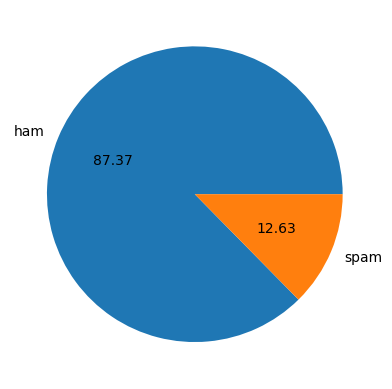

In [59]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [61]:
#DATA IS IMBALANCEDD
import nltk

In [65]:
!pip install nltk

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [73]:
df['num_characters']=df['text'].apply(len)

In [75]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [87]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [89]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [91]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [93]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [97]:
df[['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [103]:
#ham msg
df[df['target']==0][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [105]:
# spam msg
df[df['target']==1][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [107]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

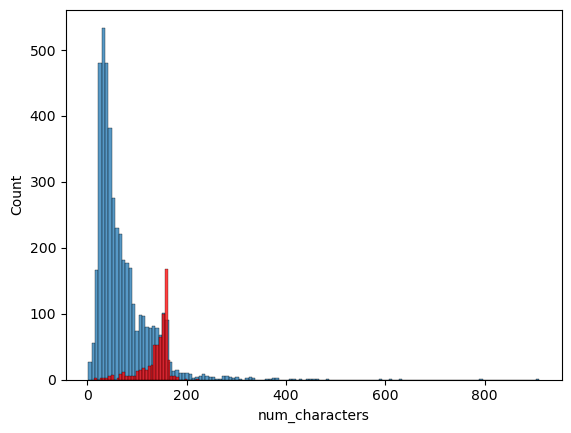

In [124]:

sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

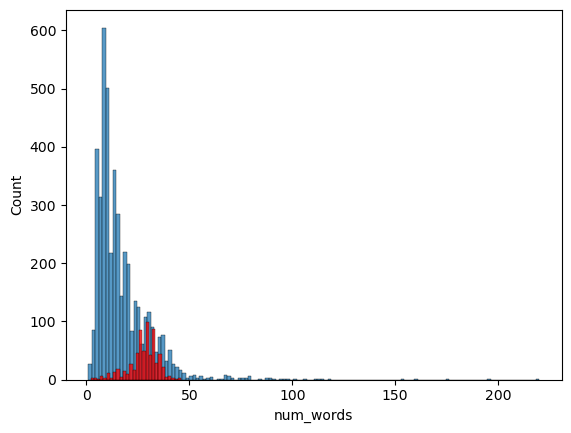

In [126]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

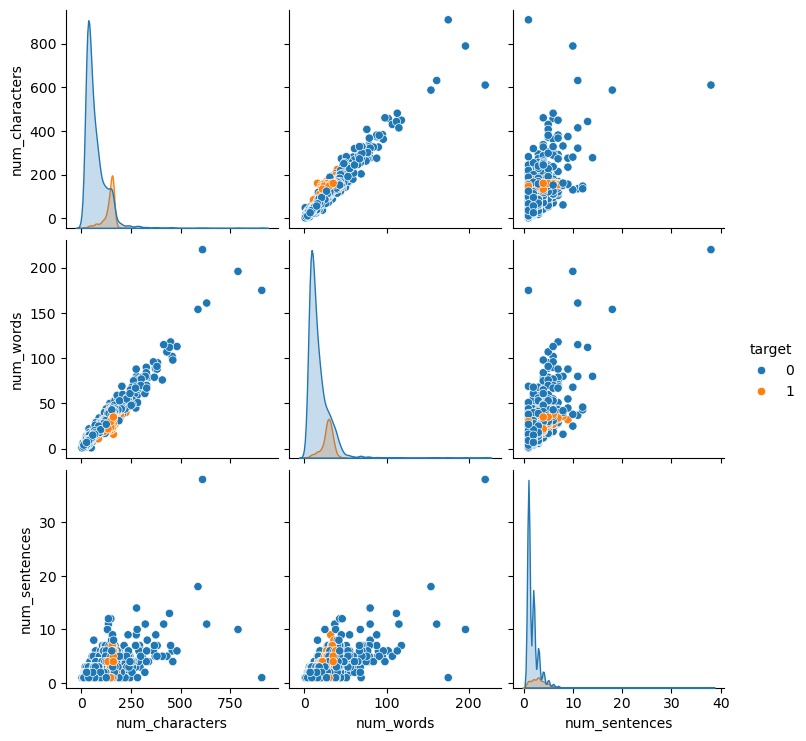

In [132]:
sns.pairplot(df,hue='target')

In [136]:
df = df.dropna()  # Drop rows with missing values

# Now calculate correlation
df.corr()


ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [138]:
print(df.dtypes)


target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [140]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)



                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


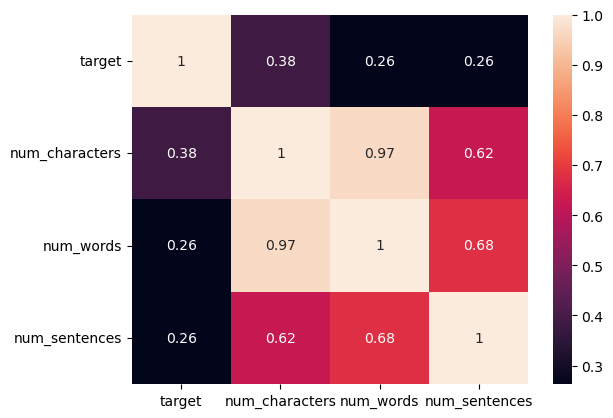

In [146]:
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [179]:
transform_text('i love the utube leactures on machine learningg.how about ')

['text']

In [157]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [171]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [173]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [177]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [183]:
df['transformed_text']=df['text'].apply(transform_text)

In [185]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,[text]
1,0,Ok lar... Joking wif u oni...,29,8,2,[text]
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,[text]
3,0,U dun say so early hor... U c already then say...,49,13,1,[text]
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,[text]


In [195]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Initialize Porter Stemmer
ps = PorterStemmer()

# Download stopwords if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()

    # Step 2: Tokenize the text
    text = nltk.word_tokenize(text)

    # Step 3: Remove non-alphanumeric characters
    y = []
    for i in text:
        if i.isalnum():  # Only keep alphanumeric tokens
            y.append(i)
    
    # Step 4: Remove stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Step 5: Apply stemming to the remaining words
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Step 6: Return the transformed text as a single string, not a list
    return " ".join(y)

# Example Usage
sample_text = "This is a sample text! It's just for testing the transform function."
transformed_text = transform_text(sample_text)
print(transformed_text)


sampl text test transform function


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,[text]
1,0,Ok lar... Joking wif u oni...,29,8,2,[text]
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,[text]
3,0,U dun say so early hor... U c already then say...,49,13,1,[text]
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,[text]


In [201]:
pip install wordcloud



   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 187.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.4 kB 187.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.4 kB 187.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 122.9 kB/s eta 0:00:03
   ------- ------------------------------- 61.4/301.4 kB 149.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.4 kB 149.3 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/301.4 kB 169.9 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.4 kB 169.3 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/301.4 kB 187.2 kB/s eta 0:00:02
   ------------------ ------------------- 143.4/301.4 kB 202.9 k

In [202]:
from wordcloud import WordCloud


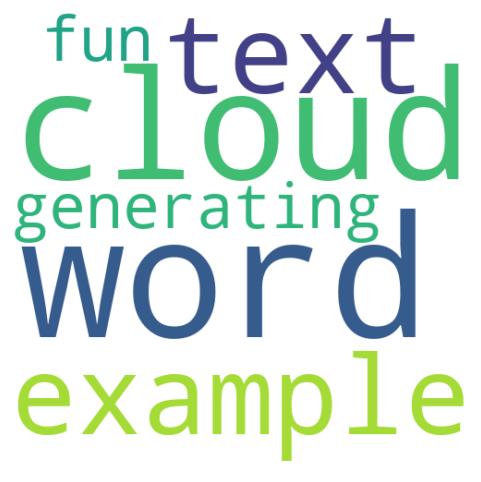

In [203]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud instance
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Sample text for the word cloud
text = "This is an example text for generating a word cloud. Word clouds are fun!"

# Generate the word cloud from the text
wc.generate(text)

# Display the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


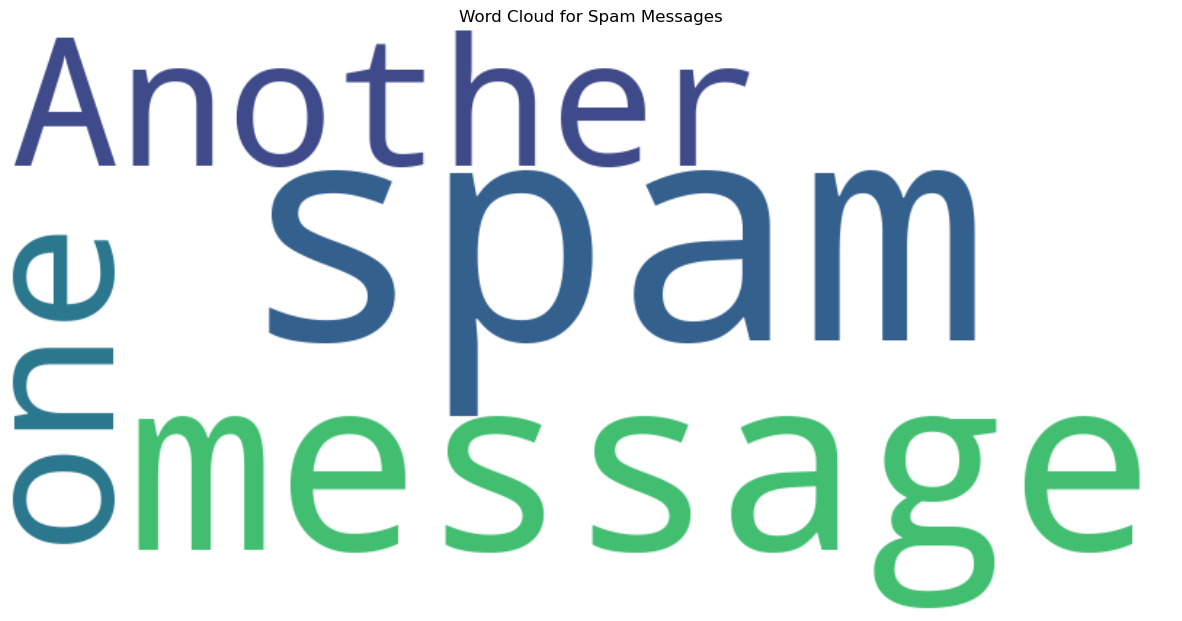

In [211]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame creation (for demonstration)
data = {
    'target': [0, 1, 0, 1, 0, 1],
    'transformed_text': [
        'This is spam message one.',
        'This is ham message two.',
        'Another spam message.',
        'Yet another ham message.',
        'More spam here!',
        'Final ham message for testing.'
    ]
}

df = pd.DataFrame(data)

# Generate a word cloud for spam messages (target = 0)
spam_wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white').generate(
    df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
)

# Display the word cloud
plt.figure(figsize=(15, 16))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Spam Messages')
plt.show()


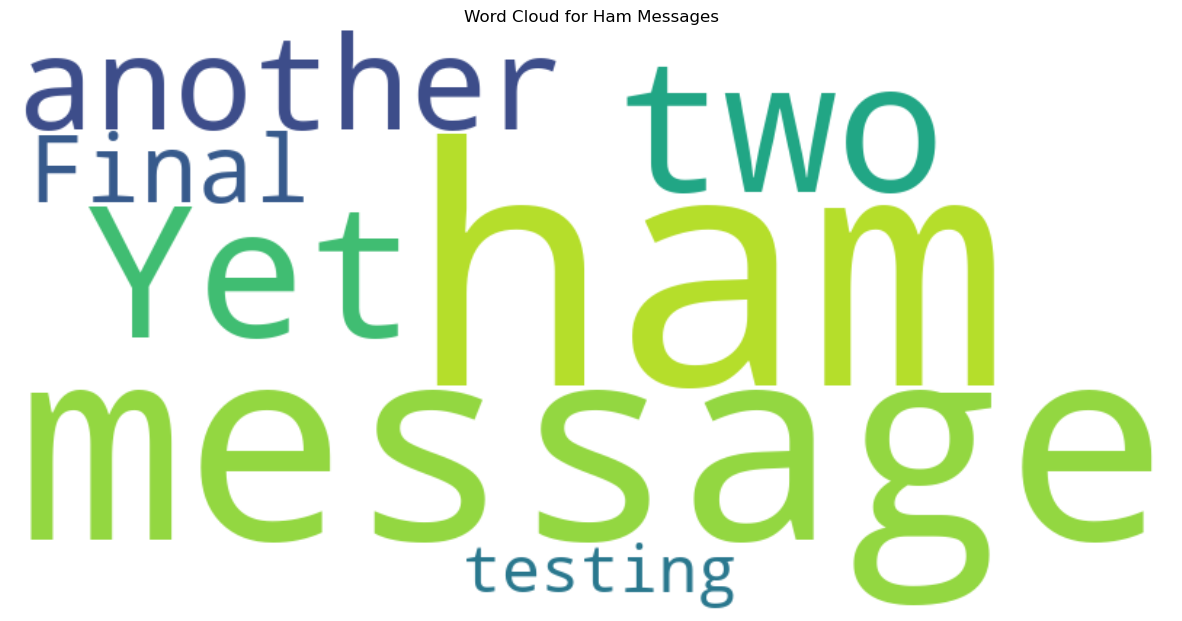

In [213]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame creation (for demonstration)
data = {
    'target': [0, 1, 0, 1, 0, 1],
    'transformed_text': [
        'This is spam message one.',
        'This is ham message two.',
        'Another spam message.',
        'Yet another ham message.',
        'More spam here!',
        'Final ham message for testing.'
    ]
}

df = pd.DataFrame(data)

# Step 1: Generate a word cloud for ham messages (target = 1)
ham_wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white').generate(
    df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
)

# Step 2: Display the word cloud
plt.figure(figsize=(15, 16))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Ham Messages')
plt.show()


In [237]:
spam_corpus = []

# Loop through all the messages in the ham (target == 1) messages
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    # Split each message into words and append them to spam_corpus
    for word in msg.split():
        spam_corpus.append(word)

# Now spam_corpus contains all the words from the ham messages


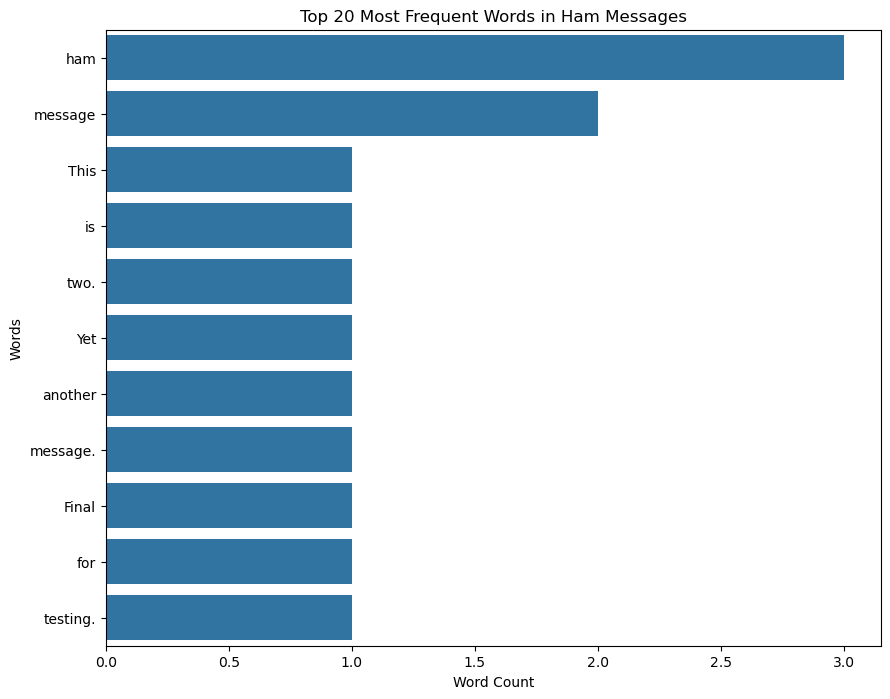

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Assuming you already have a DataFrame `df` and 'transformed_text' column

# Create a corpus for ham messages (target == 1), change to target == 0 for spam
ham_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():  # Filter ham messages
    for word in msg.split():
        ham_corpus.append(word)

# Step 2: Count word frequencies
word_counts = Counter(ham_corpus)

# Convert to a DataFrame for easier plotting (top 20 words)
word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# Step 3: Plot the Bar Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Word', data=word_freq_df)

# Add title and labels
plt.title('Top 20 Most Frequent Words in Ham Messages')
plt.xlabel('Word Count')
plt.ylabel('Words')

# Show the plot
plt.show()


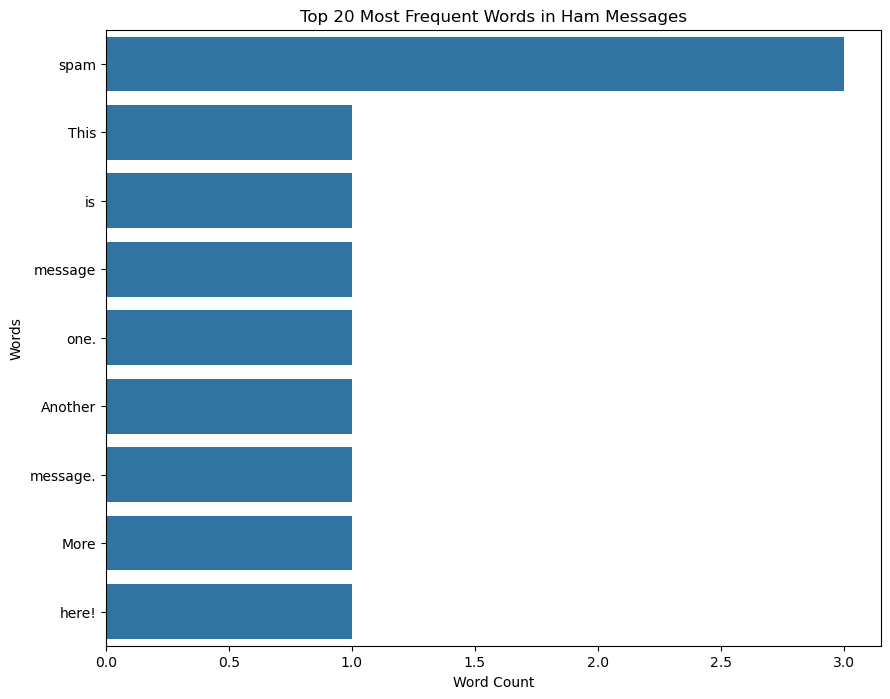

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Assuming you already have a DataFrame `df` and 'transformed_text' column

# Create a corpus for ham messages (target == 1), change to target == 0 for spam
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():  # Filter ham messages
    for word in msg.split():
        ham_corpus.append(word)

# Step 2: Count word frequencies
word_counts = Counter(ham_corpus)

# Convert to a DataFrame for easier plotting (top 20 words)
word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# Step 3: Plot the Bar Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Word', data=word_freq_df)

# Add title and labels
plt.title('Top 20 Most Frequent Words in Ham Messages')
plt.xlabel('Word Count')
plt.ylabel('Words')

# Show the plot
plt.show()


In [243]:
####$$$$$$$$$$$$$$$$ MODEL BUILDING $$$$$$$$$$$$
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [251]:
X = cv.fit_transform(df['transformed_text']).toarray()


In [253]:
X.shape

(6, 14)

In [255]:
y=df['target'].values

In [257]:
y

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [259]:
from sklearn.model_selection import train_test_split

In [261]:
X_train,X_text,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [265]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precison_score

In [267]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Example usage:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [273]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming X_train, X_test, y_train, y_test are already defined and split properly

# Step 1: Initialize and fit the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred1 = gnb.predict(X_test)

# Step 3: Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


NameError: name 'X_test' is not defined

In [271]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precison_score(y_test,y_pred2))

NameError: name 'X_test' is not defined

In [275]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precison_score(y_test,y_pred3))

NameError: name 'X_test' is not defined

In [277]:
#tfidf to  mnb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [279]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

NameError: name 'XGBClassifier' is not defined

In [281]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

NameError: name 'xgb' is not defined

In [283]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [285]:
train_classifier(svc,X_train,y_train,X_test,y_test)

NameError: name 'X_test' is not defined

In [287]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

NameError: name 'clfs' is not defined

In [289]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

NameError: name 'clfs' is not defined

In [291]:
performance_df

NameError: name 'performance_df' is not defined

In [293]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

NameError: name 'performance_df' is not defined

In [295]:
performance_df1

NameError: name 'performance_df1' is not defined

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'performance_df1' is structured like this:
# performance_df1 = pd.DataFrame({
#     'Algorithm': ['Naive Bayes', 'Naive Bayes', 'SVM', 'SVM'],
#     'variable': ['Accuracy', 'Precision', 'Accuracy', 'Precision'],
#     'value': [0.85, 0.80, 0.90, 0.88]
# })

# Creating the catplot
sns.catplot(
    x='Algorithm', y='value', hue='variable', data=performance_df1, 
    kind='bar', height=5
)

# Setting y-axis limits
plt.ylim(0.5, 1.0)

# Rotating x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


NameError: name 'performance_df1' is not defined

In [301]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm', var_name='variable', value_name='value')


NameError: name 'performance_df' is not defined

In [303]:
# model improve
# 1. Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

NameError: name 'clfs' is not defined

In [305]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

NameError: name 'clfs' is not defined

In [307]:
new_df = performance_df.merge(temp_df,on='Algorithm')

NameError: name 'performance_df' is not defined

In [309]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

NameError: name 'new_df' is not defined

In [311]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

NameError: name 'clfs' is not defined

In [313]:
new_df_scaled.merge(temp_df,on='Algorithm')

NameError: name 'new_df_scaled' is not defined

In [315]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [317]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [319]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [321]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [323]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

NameError: name 'X_test' is not defined

In [325]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [327]:
from sklearn.ensemble import StackingClassifier

In [329]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [331]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [333]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

NameError: name 'tfidf' is not defined

In [1]:
import os
os.getcwd()


'C:\\Users\\DELL\\ezitec-ml-projects\\spam-system'